In [1]:
### read the user timeline data ..
## check the decline or rise of juul data per month
## same for marijuana..

In [9]:
import pandas as pd
import numpy as np
import os
import git
import ast
import matplotlib.pyplot as plt
import networkx as nx
from tqdm import tqdm_notebook as tqdm
import tweepy

In [4]:
def get_git_root(path):
    git_repo = git.Repo(path, search_parent_directories=True)
    git_root = git_repo.git.rev_parse("--show-toplevel")
    return git_root

In [5]:
Juul_list = set(['JUUL','juulvapor','juulnation','doit4juul'])

In [6]:
def literal_return(val):
    try:
        return ast.literal_eval(val)
    except ValueError:
        return (val)

In [7]:
def check_inlist(val):
    if (type(val) == str):
        val = ast.literal_eval(val)
        if (val != None):
            a, b =  map(set, [map(str.lower, val), map(str.lower, Juul_list)])
            if len(a & b) >= 1:
                return True
            else:
                return False

In [8]:
hexagon_path = os.path.join(get_git_root(os.getcwd()),"input","hexagonData.csv")

In [12]:
user_timeline = pd.read_csv(hexagon_path,lineterminator="\n")

In [13]:
len(user_timeline)

12516

In [14]:
# so everyone of the tweets extracted from hexagon api have juul in the tweets
len(user_timeline[user_timeline['hashtags'].apply(check_inlist) == True])

12443

In [15]:
# converting to datetime before grouping
user_timeline['tweetCreatedAt'] = pd.to_datetime(user_timeline['tweetCreatedAt'])

In [16]:
user_timeline.sort_values(by='tweetCreatedAt',inplace=True)

In [17]:
## group by tweetCreated at by month
user_timeline.set_index('tweetCreatedAt',inplace=True,drop=True)

In [24]:
len(user_timeline.userID.unique())

7371

### Aggregating on users but overlapping

In [22]:
## grouping by the user 
tweets_by_user = user_timeline.groupby(pd.Grouper(freq='M')).agg({"userID": lambda x: x.nunique()})

In [27]:
# 9191, obviously there will be some users who would be tweeting again
# overlapping
np.sum(list(tweets_by_user.userID))

9191

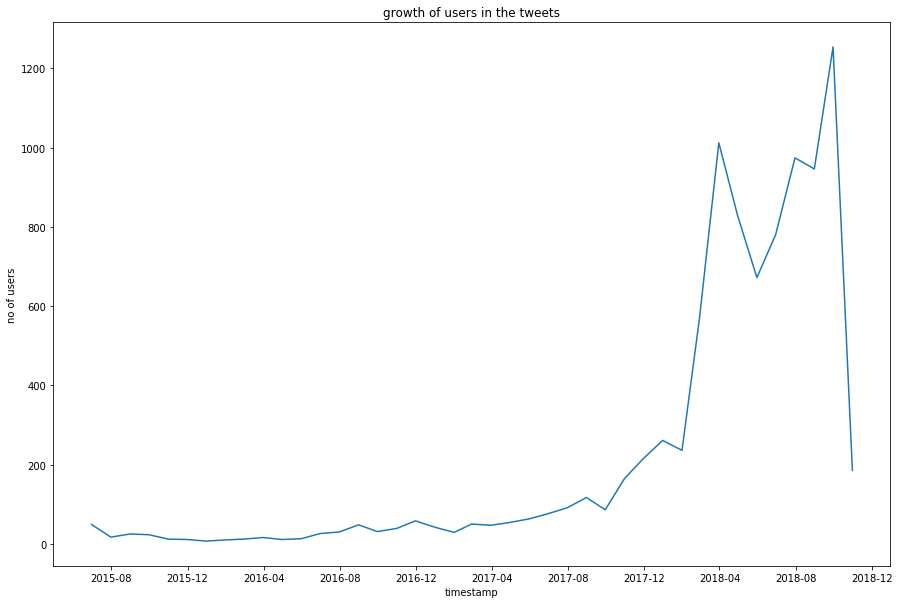

In [78]:
# plot the dataset
plt.figure(figsize=(15,10))
plt.plot(tweets_by_user.index,tweets_by_user.values)
plt.title("growth of users in the tweets")
plt.xlabel("timestamp")
plt.ylabel("no of users")
plt.show()

### Aggreagting on first occurance of the tweets

In [110]:
## now basing on users first occurances
def get_users_time(df):
    user_by_time = dict()
    for index,tweet in df.iterrows():
        user = tweet['userID']
        time = index
        if (user not in user_by_time.keys()):
            user_by_time[user] = time
    df2 = pd.DataFrame(list(user_by_time.keys()), columns=['userID'])
    df2['tweetCreatedAt'] = user_by_time.values()
    df2.set_index('tweetCreatedAt',inplace=True,drop=True)
    return(df2)

In [47]:
len(user_by_time.values())

7371

In [57]:
## now aggregating by unique time
tweets_user = pd.DataFrame(list(user_by_time.keys()), columns=['userID'])
tweets_user['tweetCreatedAt'] = user_by_time.values()
tweets_user.set_index('tweetCreatedAt',inplace=True,drop=True)

In [67]:
## counting the occurances by time
tweets_by_usern = tweets_user.groupby(pd.Grouper(freq='M')).agg('count')

In [75]:
np.sum(list(tweets_by_usern.userID))

7371

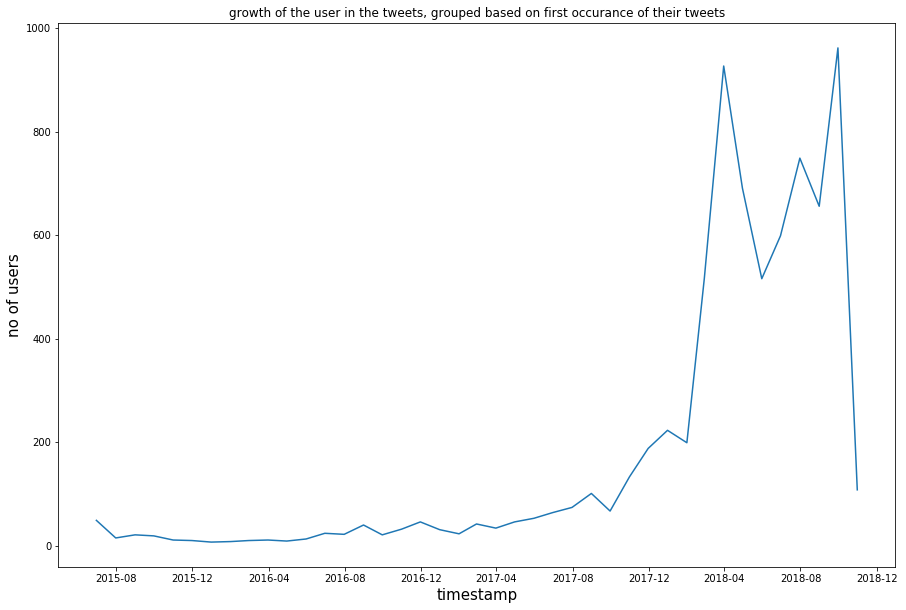

In [83]:
# plot the dataset
plt.figure(figsize=(15,10))
plt.plot(tweets_by_usern.index,tweets_by_usern.values)
plt.title("growth of the user in the tweets, grouped based on first occurance of their tweets")
plt.xlabel("timestamp", fontsize=15)
plt.ylabel("no of users", fontsize= 15)
plt.show() 

### Aggregating on tweets (not users)

In [19]:
# tweets = user_timeline.groupby(by=[user_timeline.index.year,user_timeline.index.month])['tweetId'].agg('count')
tweets = user_timeline.groupby(pd.Grouper(freq='M'))['tweetId'].agg('count')

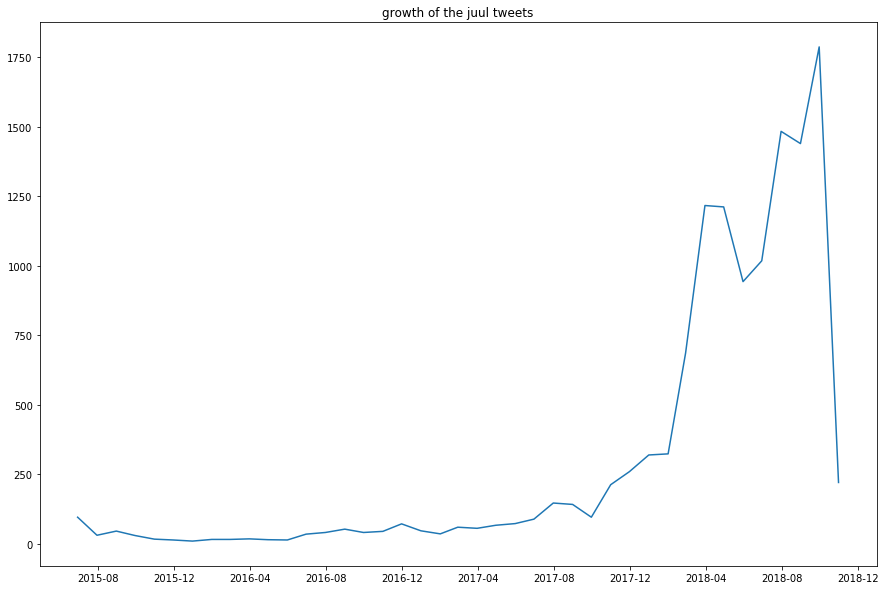

In [281]:
# plot the dataset
plt.figure(figsize=(15,10))
plt.plot(tweets.index,tweets.values)
plt.title("growth of the juul tweets")
plt.show()

In [84]:
## usign the same dataset to get the marijuana tweets
## read the weed words pattern
weed_df = pd.read_excel("/Users/akshayuppal/Desktop/thesis/backup_stuff/Weed_words.xlsx")

In [85]:
weed_words =  [str(" " + ele + " ") for ele in list(weed_df.weed)]
pattern_weed = "|".join(weed_words)

In [86]:
weed_tweets = user_timeline.loc[user_timeline['tweetText'].str.contains(pattern_weed) == True]

### Aggregating weed users first occurances

In [105]:
## now basing on users first occurances
def get_users_time(df):
    user_by_time = dict()
    for index,tweet in df.iterrows():
        user = tweet['userID']
        time = index
        if (user not in user_by_time.keys()):
            user_by_time[user] = time
    df2 = pd.DataFrame(list(user_by_time.keys()), columns=['userID'])
    return(df2)

In [111]:
## rise of weed tweets over time
weed_tweets_u = get_users_time(weed_tweets)

/Users/akshayuppal/anaconda3/envs/juul/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


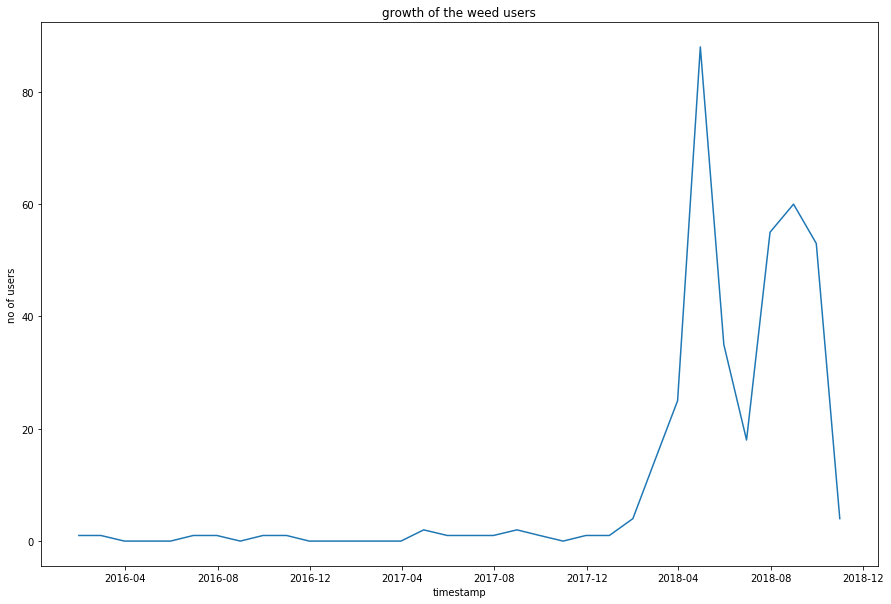

In [115]:
weed_users = pd.DataFrame
weed_user = weed_tweets_u.groupby(pd.Grouper(freq='M'))['userID'].agg({"userID": lambda x: x.nunique()})
plt.figure(figsize=(15,10))
plt.plot(weed_user.index,weed_user.values)
plt.title("growth of the weed users")
plt.xlabel("timestamp")
plt.ylabel("no of users")
plt.show()

### Aggreating on weed tweets (not users)

In [87]:
# tweets = user_timeline.groupby(by=[user_timeline.index.year,user_timeline.index.month])['tweetId'].agg('count')
weeds = weed_tweets.groupby(pd.Grouper(freq='M'))['tweetId'].agg('count')

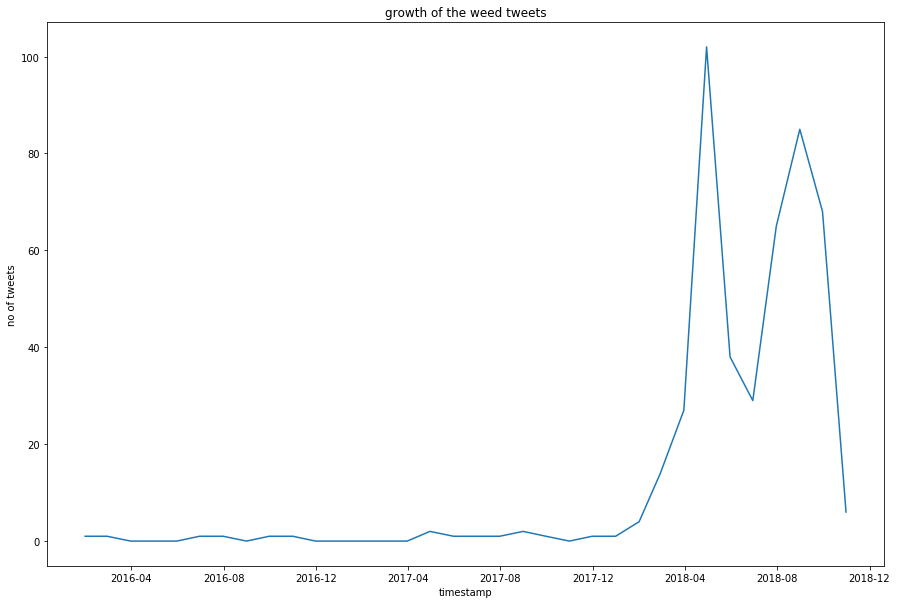

In [116]:
## rise of weed tweets over time
plt.figure(figsize=(15,10))
plt.plot(weeds.index,weeds.values)
plt.title("growth of the weed tweets")
plt.xlabel("timestamp")
plt.ylabel("no of tweets")
plt.show()

In [126]:
# importing the user timeline with 200 tweets
timeline_user = pd.read_csv("/Users/akshayuppal/Desktop/thesis/twitter_juul/input/userTimelineData.csv",lineterminator="\n")


In [127]:
juul_tweet_pattern = "|".join(Juul_list)

In [128]:
## find all of the juul_tweets
juul_tweets = timeline_user.loc[timeline_user['tweetText'].str.contains(juul_tweet_pattern)]

In [129]:
## total of the juul tweets from the timelines
len(juul_tweets)

5173

In [130]:
# converting to datetime before grouping
juul_tweets['tweetCreatedAt'] = pd.to_datetime(juul_tweets['tweetCreatedAt'])
juul_tweets.sort_values(by='tweetCreatedAt',inplace=True)

/Users/akshayuppal/anaconda3/envs/juul/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/akshayuppal/anaconda3/envs/juul/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## timeline dataset

### growth of users

In [131]:
## group by tweetCreated at by month
juul_tweets.set_index('tweetCreatedAt',inplace=True,drop=True)
tweets_juul_user = juul_tweets.groupby(pd.Grouper(freq='M'))['userID'].agg({"userID": lambda x: x.nunique()})

/Users/akshayuppal/anaconda3/envs/juul/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


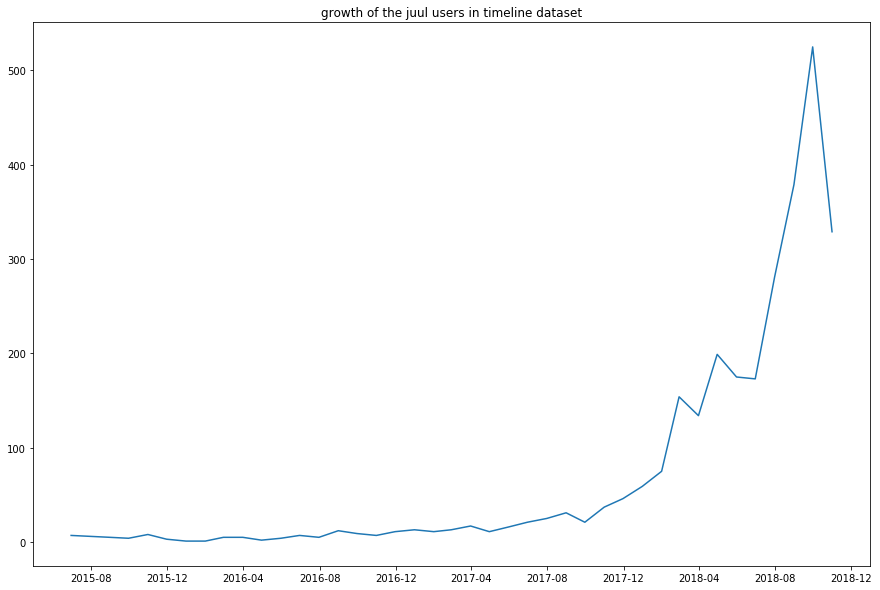

In [132]:
## rise of weed tweets over time ..cotains 200 tweets per user
plt.figure(figsize=(15,10))
plt.plot(tweets_juul_user.index,tweets_juul_user.values)
plt.title("growth of the juul users in timeline dataset")
plt.show()

### growth of tweets


In [133]:
## group by tweetCreated at by month
tweets_juul = juul_tweets.groupby(pd.Grouper(freq='M'))['tweetId'].agg('count')

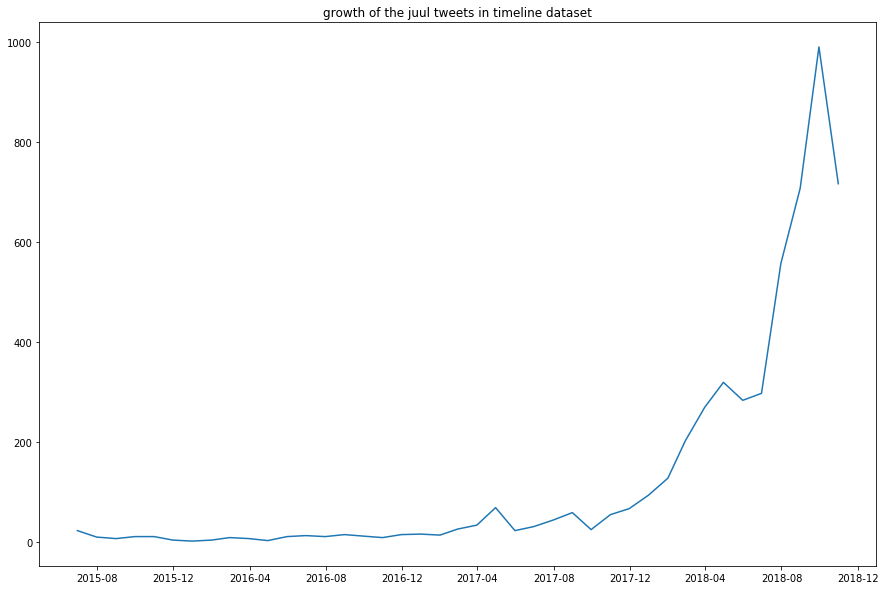

In [134]:
## rise of juul tweets over time ..cotains 200 tweets per user
plt.figure(figsize=(15,10))
plt.plot(tweets_juul.index,tweets_juul.values)
plt.title("growth of the juul tweets in timeline dataset")
plt.show()

In [139]:
# find all of the weed tweets
weed_tweets = timeline_user.loc[timeline_user['tweetText'].str.contains(pattern_weed)]

In [140]:
weed_tweets['tweetCreatedAt'] = pd.to_datetime(weed_tweets['tweetCreatedAt'])

/Users/akshayuppal/anaconda3/envs/juul/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [141]:
## group by tweetCreated at by month
weed_tweets.set_index('tweetCreatedAt',inplace=True,drop=True)
tweet_weeds = weed_tweets.groupby(pd.Grouper(freq='M'))['tweetId'].agg('count')

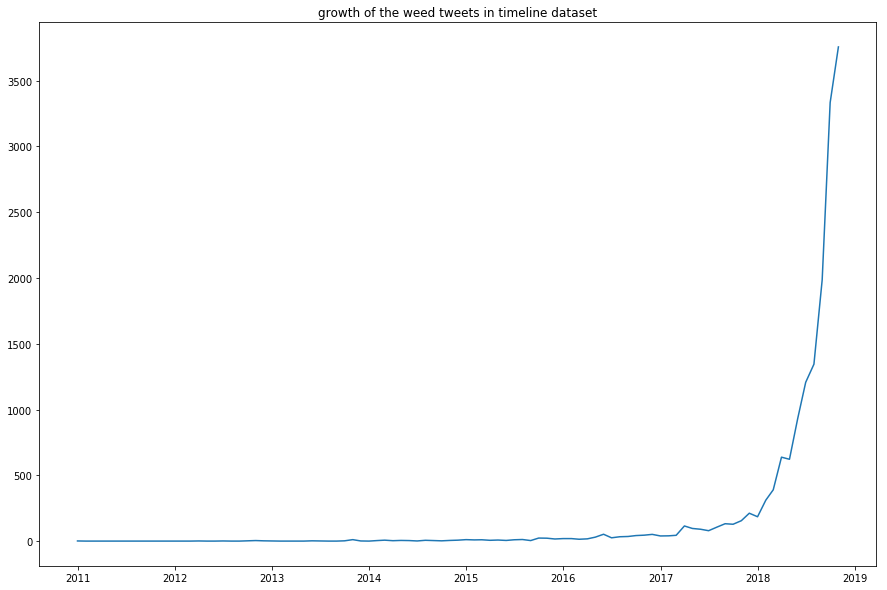

In [142]:
## rise of weed tweets over time ..cotains 200 tweets per user
plt.figure(figsize=(15,10))
plt.plot(tweet_weeds.index,tweet_weeds.values)
plt.title("growth of the weed tweets in timeline dataset")
plt.show()

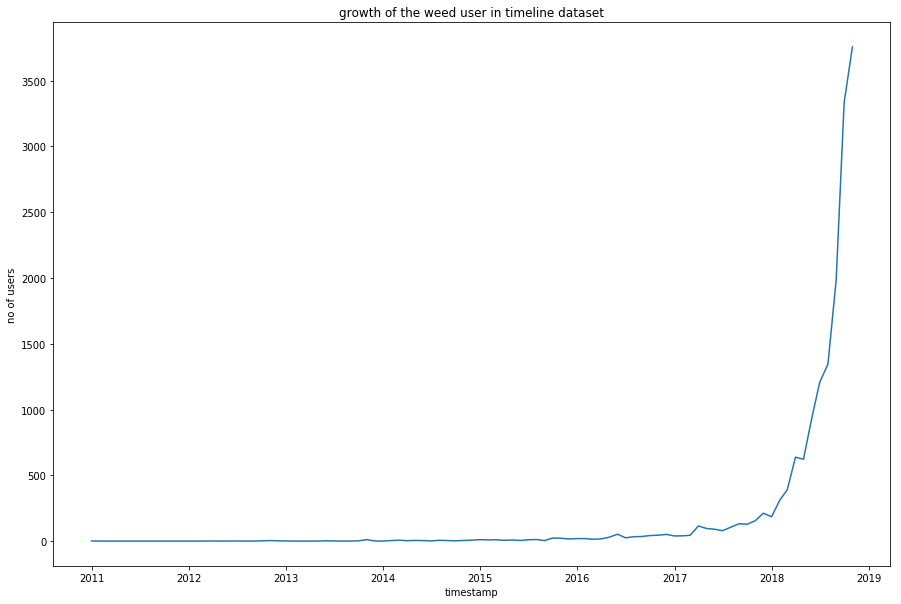

In [144]:
tweet_weeds = weed_tweets.groupby(pd.Grouper(freq='M'))['userID'].agg('count')
## rise of weed tweets over time ..cotains 200 tweets per user
plt.figure(figsize=(15,10))
plt.plot(tweet_weeds.index,tweet_weeds.values)
plt.title("growth of the weed user in timeline dataset")
plt.xlabel("timestamp")
plt.ylabel("no of users")
plt.show()

## loking at the retweets

In [155]:
user_timeline = pd.read_csv(hexagon_path,lineterminator="\n")

In [203]:
# sort by timestamp 
user_timeline['tweetCreatedAt'] = pd.to_datetime(user_timeline['tweetCreatedAt'])
user_timeline.sort_values(by='tweetCreatedAt',inplace=True)
user_timeline.set_index('tweetCreatedAt',inplace=True,drop=True)

In [209]:
user_timeline.columns

Index(['favourites_count', 'friendList', 'friendsCount', 'hashtags',
       'imageurl', 'lang', 'retweetCount', 'retweeted', 'tweetId', 'tweetText',
       'userCreatedAt', 'userDescription', 'userFollowersCount', 'userID',
       'userLocation', 'userName\r'],
      dtype='object')

In [217]:
## getting the tweet text and their occurances
tweet_retweet = dict()
tweet_text_list = list()
for index,tweet in user_timeline.iterrows():
    user = tweet['userID']
    text = tweet['tweetText']
    retweet_count = tweet['retweetCount']
    if text not in tweet_text_list:
        tweet_retweet[user] = retweet_count
        tweet_text_list.append(text)

In [222]:
print("users",len(user_timeline.userID.unique()))
print("tweet_text",len(user_timeline.tweetText.unique()))

users 7371
tweet_text 7235


In [224]:
len(tweet_retweet)

3927

In [228]:
user_retweets2 = pd.DataFrame(list(tweet_retweet.keys()), columns=['userID'] )
user_retweets2['retweet_count'] =  tweet_retweet.values()
user_retweets2_ = user_retweets2.groupby(by='retweet_count').agg('count')

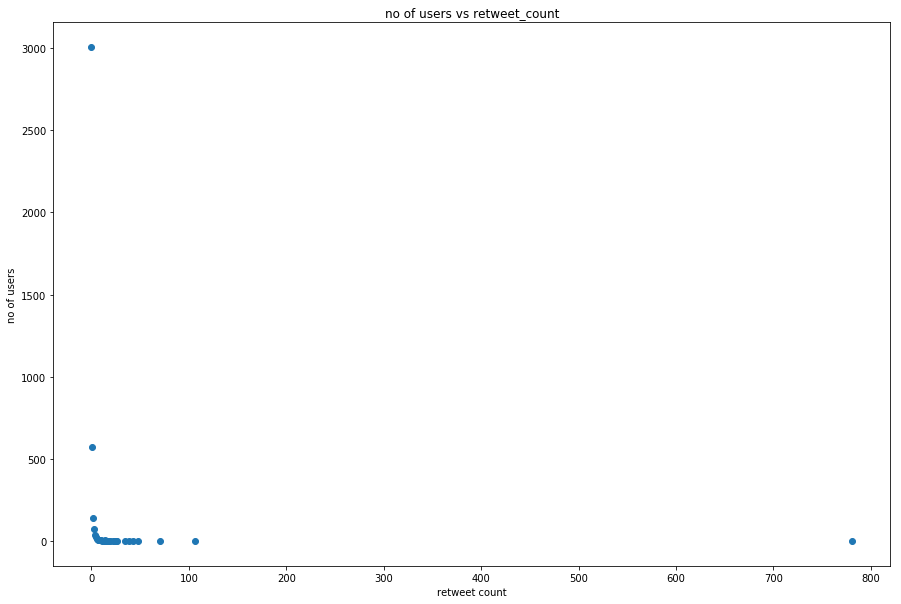

In [239]:
plt.figure(figsize=(15,10))
plt.scatter(user_retweets2_.index,user_retweets2_.values)
plt.title("no of users vs retweet_count")
plt.xlabel("retweet count")
plt.ylabel("no of users")
plt.show()

## users vs retweet count

In [170]:
users = user_timeline.userID.unique()
user_retweet_count = dict()
for user in users:
    users = user_timeline.loc[user_timeline.userID == user].head(1)
    user_retweet_count[user] = users.retweetCount.values[0]

In [188]:
user_retweets = pd.DataFrame(list(user_retweet_count.keys()), columns=['userID',])
user_retweets['retweet_count'] = list(user_retweet_count.values())

In [200]:
user_retweets_u = user_retweets.groupby(by='retweet_count').agg('count')

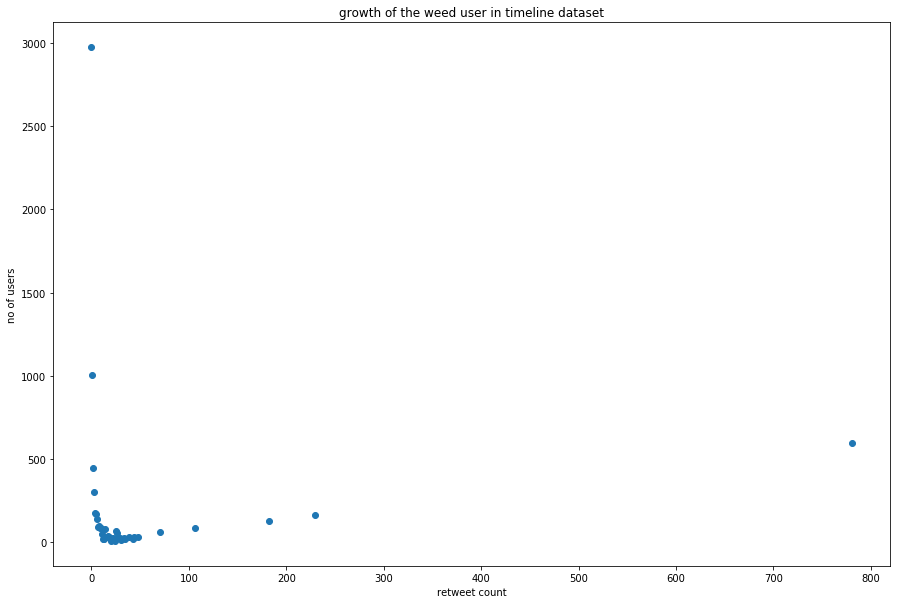

In [202]:
# not using this one as twitter updates retweet count for all users involved in spreading of cascade..
plt.figure(figsize=(15,10))
plt.scatter(user_retweets_u.index,user_retweets_u.values)
plt.title("growth of the weed user in timeline dataset")
plt.xlabel("retweet count")
plt.ylabel("no of users")
plt.show()

## Cascade

In [9]:
## @TODO add it to python file
def create_retweet_edgelist(source_node,user_list,filename):
    with open(filename,"w+") as f: 
        for user in tqdm(user_list):
            apis.rotate(-1)
            api = apis[0]
            if (user != source_node):
                try:
                    relation_obj = api.show_friendship(source_id = int(source_node), target_id = (user))[0]
                    if (relation_obj.following == True):
                        f.write(str(source_node) + " " + str(user)+"\n")
                    if (relation_obj.followed_by == True):
                        f.write(str(user) + " " + str(source_node)+"\n")
                except tweepy.TweepError as e:
                    continue

In [84]:
## need to look at cascade the large cascade..
hexagon_path = os.path.join(get_git_root(os.getcwd()),"input","hexagonData.csv")
hexagon_data = pd.read_csv(hexagon_path,lineterminator="\n")

In [85]:
cascade1 = (hexagon_data.loc[hexagon_data['retweetCount'] ==781])
cascade1.sort_values(by='tweetCreatedAt',inplace=True)
# getting the first node the sorted list
tattoo_node = cascade1.head(1)['userID'].values[0]

In [30]:
cascade1.head(1)['userID']

3853    1394686213
Name: userID, dtype: int64

In [15]:
tattoo_node

1394686213

In [16]:
user_tattoos = list(cascade1.userID)
user_tattoos.remove(tattoo_node)

In [20]:
create_retweet_edgelist(tattoo_node,user_tattoos,'tattoo.edgelist')


100%|██████████| 597/597 [12:32<00:00,  3.53it/s]


In [22]:
# and the data has retweets of 598 / 781 
G_tattoo_1 = nx.read_adjlist('/home/akshayuppal2345/twitter_juul/models/tattoo1.edgelist',create_using=nx.DiGraph())

In [21]:
len(G_tattoo_1.edges())

365

In [22]:
# so 352/598 forms the 1st level connection
len(G_tattoo_1.nodes())

352

In [23]:
color_map = list()
for node in G_tattoo_1.nodes():
    if node != str(tattoo_node):
        color_map.append("red")
    else:
        color_map.append("yellow")

In [24]:
str(tattoo_node) in G_tattoo_1.nodes()

True

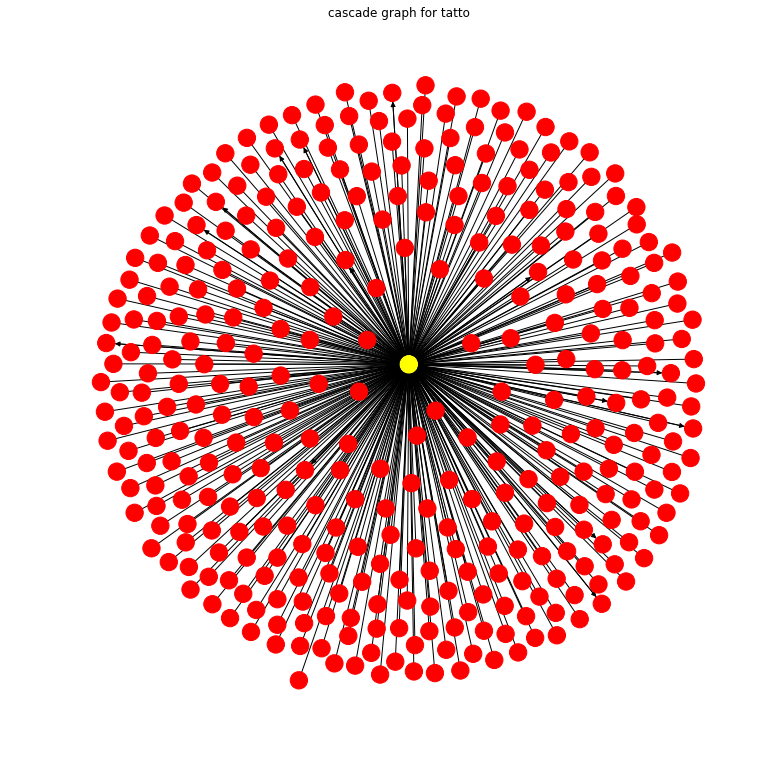

In [26]:
# cascade graph --dont rum
%matplotlib inline
plt.figure(figsize=(10,10))
nx.draw_spring(G_tattoo_1,node_color=color_map,label=False)
plt.title("cascade graph for tatto")
plt.show()

In [83]:
## need to look at cascade the large cascade..
hexagon_data = pd.read_csv(hexagon_path,lineterminator="\n")

NameError: name 'hexagon_path' is not defined

In [15]:
cascade1 = (hexagon_data.loc[hexagon_data['retweetCount'] ==781])

In [16]:
cascade1.sort_values(by='tweetCreatedAt',inplace=True)

/home/akshayuppal2345/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [17]:
# and the data has retweets of 598 / 781 
G_tattoo_1 = nx.read_adjlist('/home/akshayuppal2345/twitter_juul/models/tattoo1.edgelist',create_using=nx.DiGraph())

In [18]:
# the main follwoing graph 
G = nx.read_edgelist("/home/akshayuppal2345/twitter_juul/models/user-user_c.edgelist",
                     create_using=nx.DiGraph())


In [82]:
# getting the first node the sorted list
tattoo_node = cascade1.head(1)['userID'].values[0]

NameError: name 'cascade1' is not defined

In [20]:
# follower tatto node(in degree)
len(G_tattoo_1.in_edges(str(tattoo_node)))

351

In [58]:
# return the dataframe @type= <following,follower>
def find_connections(apis,user_list,typef='following'):
    df = pd.DataFrame()
    print("finding connection for "+ typef + " network might take some time\n")
    for user in tqdm(user_list):
        apis.rotate(1)
        api = apis[0]
        try:
            if typef == 'following':
                following = (api.followers_ids(user))  # return list of followers
                data = {
                        'userID':user,
                        'following_list':following
                }
            elif typef == 'followers':
                friends = (api.friends_ids(user))  # return list of following
                data = {
                        'userID':user,
                        'followers_list':friends
                }
            else:
                print("wrong type specified")
            df = df.append(data,ignore_index=True)
        except tweepy.TweepError as e:
            continue
    return df

In [87]:
# now will check the relationship of all node with the source node, does it have folower or following rel.
def create_cascade_lvl_1(source_node,user_list):
    G = nx.DiGraph() # will add edges directly
    # users type(int)
    for user in tqdm(user_list):
        apis.rotate(-1)
        api = apis[0]
        if (user != source_node):
            try:
                relation_obj = api.show_friendship(source_id = (source_node), target_id = (user))[0]
                if ((relation_obj.following == True) or (relation_obj.followed_by == True)):
                    if (relation_obj.following == True):
                        G.add_edge(source_node,user)
                    if (relation_obj.followed_by == True):
                        G.add_edge(user,source_node)
            except tweepy.TweepError as e:
                continue
    first_nodes = [int(node) for node in G.nodes()]
    first_nodes.remove(source_node)
    print(len(first_nodes))
    return(G,first_nodes)

In [90]:
def create_cascade(G,source_id,user_list,level):
    if len(G) is 0:
        print("getting lvl 1")
        G,first_nodes = create_cascade_lvl_1(source_id,user_list)
        rem_users = list(set(user_list) - set(first_nodes))
        print(len(rem_users))
        return create_cascade(G,first_nodes,rem_users,1)
    else:
        print("at level ",level+1)
        print(user_list)
        if (len(user_list) != 0):
            second_user = list()
            apis.rotate(-1)
            apis = apis[0]
            # find both the following and follower relationship
            df_following = find_connections(apis,source_id,'following')
            df_followers = find_connections(apis,source_id,'followers')
            for node in tqdm(source_id):
                for user in user_list:
                    followers = (df_following.following_list[df_following.userID == node].values[0])
                    following = (df_followers.followers_list[df_followers.userID == node].values[0])        
                    if ((user in set(followers)) or (user in set(following))):
                        if (user not in second_user):
                            second_user.append(user)
                        if (user in set(followers)):
                            G.add_edge(user,node)
                        if user in set(following):
                            G.add_edge(node,user)
            path = 'graph_temp'+ str(level+1) + '.pkl'
            with open(path, 'wb') as handle:
                pickle.dump(G, handle, protocol=pickle.HIGHEST_PROTOCOL)
            rem_users = list(set(user_list) - set(second_user))
            return create_cascade(G,second_user,rem_users,level+1)

In [21]:
# following tatto node(out degree)
len(G_tattoo_1.out_edges(str(tattoo_node)))

14

In [22]:
first_level_users = list(G_tattoo_1.nodes())
first_level_users.remove(str(tattoo_node))
first_level_users = [int(node) for node in first_level_users]

In [23]:
user_tattoos = list(cascade1.userID)
user_tattoos.remove(tattoo_node)

In [24]:
## getting to the second level of cascade
rem_users = list(set(user_tattoos) - set([int(node) for node in G_tattoo_1.nodes()]))
len(rem_users)
## 597 - 352

245

In [39]:
## # so the rem users dont have a direct conenction with the tattoo node so we will look at 
##the following graph(from main follwing garph of user)  of the first level node and also their follower network
blue_users = list()
with open("tattoo_1_lvl_following.edgelist","w+") as f:
    for node in tqdm(first_level_users):
        # get the following .. hence the outdegree of those nodes
        node = str(node)
        if (node) in G.nodes():
            following = [int(i[1]) for i in G.out_edges(node)]
            for user in rem_users:
                if (user) in following:
                    if user not in blue_users:
                        blue_users.append(user)
                    f.write(str(node) + ' ' + str(user) +'\n')

In [48]:
# def following_network(users)
## getting the followers network for the first level users
df = pd.DataFrame()
for user in tqdm(first_level_users):
    try:
        apis.rotate(-1)
        api = apis[0]
        friendList = api.followers_ids(user)  # @API returns list of friends
        temp = pd.DataFrame(
            {'userID':user,
             'follower':[friendList]})
        df = df.append(temp)
    except:
        print("Some error in connection")
        continue

here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
Some error in connection
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
Some error in connection
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here


In [49]:
## dumping the followers for tatto cascade level 1
df.to_csv("/home/akshayuppal2345/twitter_juul/models/follower_tattoo_rem_users.csv")

In [25]:
followers_network = pd.read_csv("/home/akshayuppal2345/twitter_juul/models/follower_tattoo_rem_users.csv",index_col=0)

In [26]:
followers_network.reset_index(drop=True, inplace=True)

In [55]:
with open("tatto_1st_lvl_followers.edgelist","w+") as f:
    pink_users = list()
    for node in tqdm(first_level_users):
        for user in rem_users:
            if node in list(followers_network.userID):
                followers = ast.literal_eval(followers_network.follower[followers_network.userID == node].values[0])
                if user in set(followers):
                    f.write(str(user) + " " + str(node) +"\n")
                    pink_users.append(user)

### network Properties

In [145]:
## need to look at cascade the large cascade..
hexagon_path = os.path.join(get_git_root(os.getcwd()),"input","hexagonData.csv")
hexagon_data = pd.read_csv(hexagon_path,lineterminator="\n")

cascade1 = (hexagon_data.loc[hexagon_data['retweetCount'] ==781])
cascade1.sort_values(by='tweetCreatedAt',inplace=True)
# getting the first node the sorted list
tattoo_node = cascade1.head(1)['userID'].values[0]

/Users/akshayuppal/anaconda3/envs/juul/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [352]:
# and the data has retweets of 598 / 781 
G_tattoo_1 = nx.read_adjlist('/Users/akshayuppal/Desktop/thesis/twitter_juul/models/tattoo1.edgelist', create_using=nx.DiGraph(), nodetype=int)


In [353]:
# first level users: users connected in the first shell with source node
first_level_users = list(G_tattoo_1.nodes())
first_level_users.remove((tattoo_node))

In [354]:
len(G_tattoo_1.nodes())  # lvl 1

352

In [321]:
## opeing the edgelist for blue and pink users
G_blue1 = nx.read_edgelist("/Users/akshayuppal/Desktop/thesis/twitter_juul/models/tattoo_1_lvl_following.edgelist", nodetype=int)
blue_users = list(set(G_blue1.nodes()) - (set(G_blue1.nodes()).intersection(set(G_tattoo_1.nodes()))))
G_tattoo_1.add_edges_from(G_blue1.edges())

In [322]:
G_pink1 = nx.read_edgelist("/Users/akshayuppal/Desktop/thesis/twitter_juul/models/tatto_1st_lvl_followers.edgelist",nodetype=int)
pink_users = list(set(G_pink1.nodes()) - (set(G_pink1.nodes()).intersection(set(G_tattoo_1.nodes()))))
G_tattoo_1.add_edges_from(G_pink1.edges())

In [324]:
# tattoo node is the source node
source_node = tattoo_node
first_nodes = first_level_users
blue_users = blue_users
pink_users = pink_users

In [325]:
color_map = list()
for (node) in G_tattoo_1.nodes():
    if (node) == source_node:
        color_map.append("yellow")
    else:
        if node in set(blue_users):
            color_map.append("red")
        elif node in set(pink_users):
            color_map.append("green")
        elif (node) in set(first_nodes):
            color_map.append("blue")

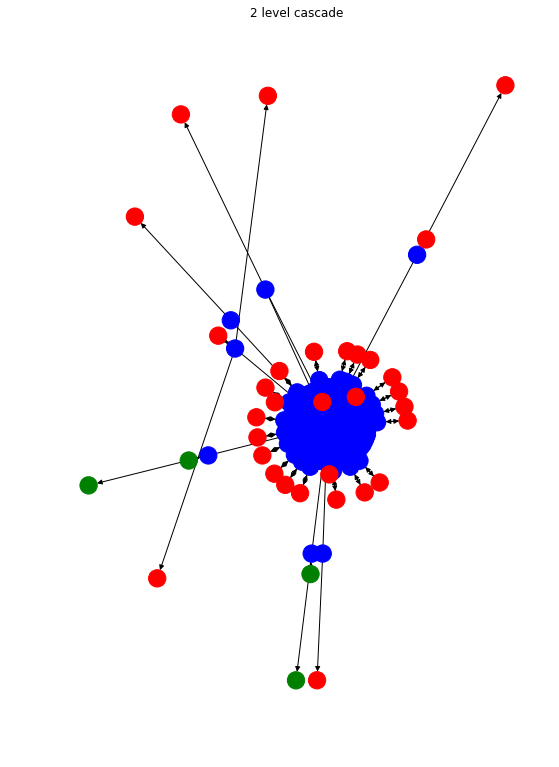

In [210]:
%matplotlib inline
plt.figure(figsize=(10,10))
nx.draw(G_tattoo_1,node_color=color_map,with_labels=False,)
# nx.draw(G,nodelist=pos.keys(),pos=pos,node_color=color_map,with_labels=False,)
ax = plt.gca()
ax.set_aspect('equal')
ax.set_axis_off()
plt.title("2 level cascade")
plt.show()

In [199]:
# tattoo node is the source node
source_node = str(tattoo_node)
first_nodes = [str(node) for node in first_level_users]
blue_users = [str(node) for node in blue_users]
pink_users = [str(node) for node in pink_users]

In [207]:
shells =  [[source_node]] + [first_nodes]  + [blue_users + pink_users]
pos = nx.shell_layout(G_tattoo_1,shells)

In [208]:
## for shells
color_map = list()
for (node) in pos.keys():
    if node == source_node:
        color_map.append("yellow")
    else:
        if node in set(blue_users):
            color_map.append("red")
        elif node in set(pink_users):
            color_map.append("green")
        elif node in set(first_nodes):
            color_map.append("blue")

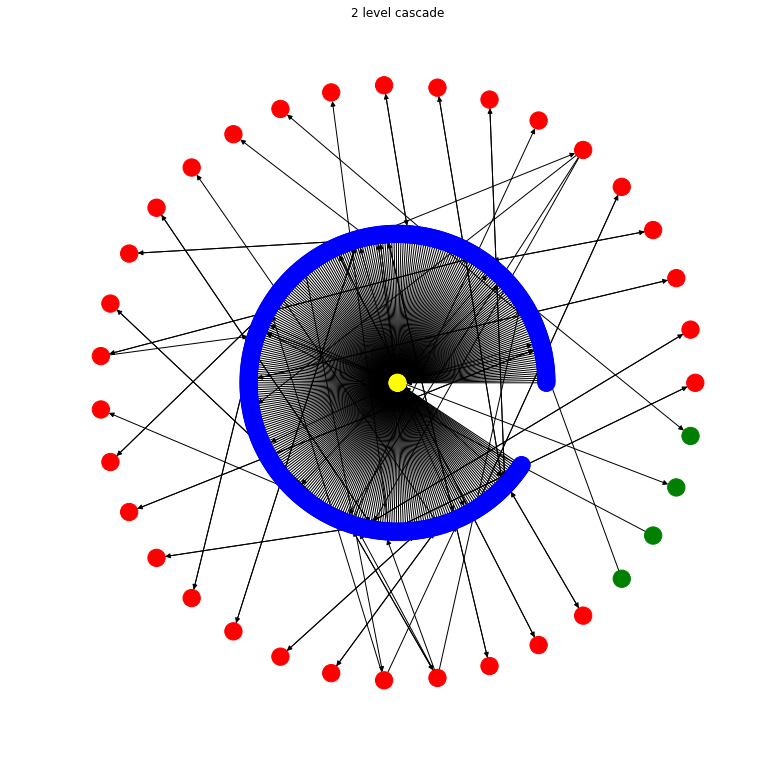

In [209]:
%matplotlib inline
plt.figure(figsize=(10,10))
nx.draw(G_tattoo_1,nodelist=pos.keys(),pos=pos,node_color=color_map,with_labels=False,)
ax = plt.gca()
ax.set_aspect('equal')
ax.set_axis_off()
plt.title("2 level cascade")
plt.show()

### lets play with the cascade

In [37]:
len(G_tattoo_1.edges())

432

In [49]:
 len(G_tattoo_1.nodes())

387

In [52]:
# get the reproduction rate or the outdegree
out_degree = list()
for node in G_tattoo_1.out_degree():
    out_degree.append(node[1])

In [259]:
out_counts = dict()
for ele in out_degree:
    if ele not in out_counts.keys():
        out_counts[ele] = 1
    else:
        out_counts[ele] +=1

In [265]:
sum(out_degree)/sum(out_counts.values())

1.1162790697674418

In [77]:
# get the indegree or the indegree
in_degree = list()
for i in G_tattoo_1.in_degree():
    in_degree.append(i[1])
avg_indegree = sum(in_degree)/ len(in_degree)
avg_indegree

1.1162790697674418

In [58]:
# so the average outdegree is less than 1.8 the one the paper quoted..
# reproduction_rate = 1.116 (avg out_degree for any node)
# avg_outdegree = 1.116
# avg_indegee = 1.116
reproduction_rate

1.1162790697674418

In [216]:
cascade1

Index(['2018-03-25 21:37:52', '2018-03-25 21:38:01', '2018-03-25 21:38:02',
       '2018-03-25 21:38:02', '2018-03-25 21:38:04', '2018-03-25 21:38:04',
       '2018-03-25 21:38:05', '2018-03-25 21:38:06', '2018-03-25 21:38:06',
       '2018-03-25 21:38:06',
       ...
       '2018-06-14 20:20:40', '2018-06-16 23:56:06', '2018-06-27 13:41:26',
       '2018-07-03 09:43:15', '2018-07-06 03:10:36', '2018-07-09 19:28:26',
       '2018-07-17 05:44:43', '2018-07-17 05:54:26', '2018-07-17 06:12:14',
       '2018-09-09 04:31:23'],
      dtype='object', name='tweetCreatedAt', length=598)

In [146]:
## group by cascade tweets at by day
cascade1 = (hexagon_data.loc[hexagon_data['retweetCount'] ==781])
cascade1['tweetCreatedAt'] = pd.to_datetime(cascade1['tweetCreatedAt'])
cascade1.sort_values(by='tweetCreatedAt',inplace=True)
cascade1.set_index('tweetCreatedAt',inplace=True,drop=True)

/Users/akshayuppal/anaconda3/envs/juul/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/akshayuppal/anaconda3/envs/juul/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


## finding users in the data

In [152]:
cascade_tattoo_u = cascade1.groupby(pd.Grouper(freq='M')).agg({"userID": lambda x: x.nunique()})

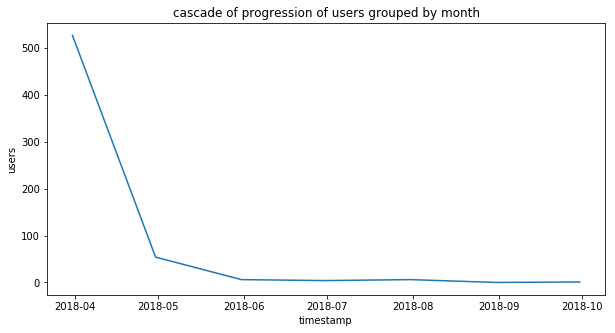

In [154]:
# it correrelates with the transient type graph as highlighted in the paper
%matplotlib inline
plt.figure(figsize=(10,5))
plt.title("cascade of progression of users grouped by month")
plt.xlabel("timestamp")
plt.ylabel("users")
plt.plot(cascade_tattoo_u.index,cascade_tattoo_u.values)
plt.show()

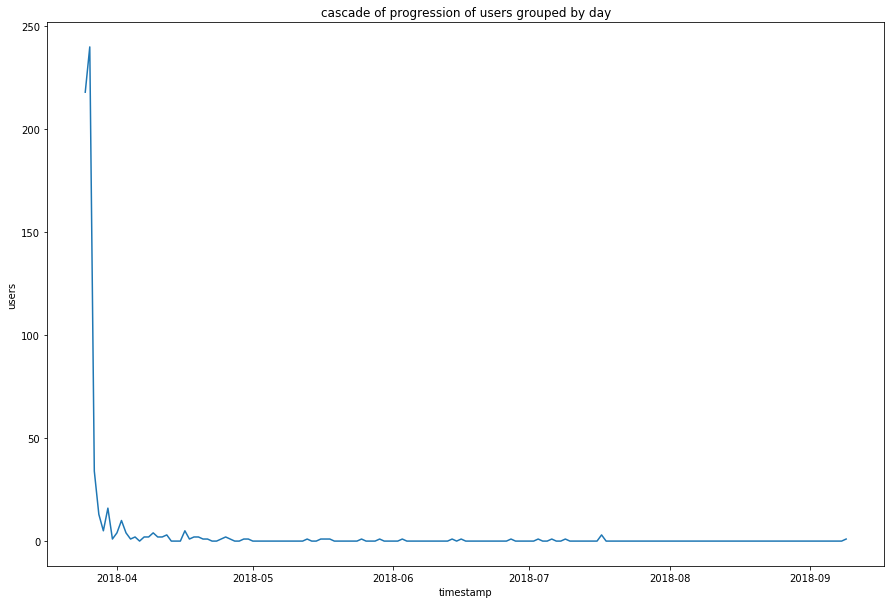

In [244]:
cascade_tattoo_u = cascade1.groupby(pd.Grouper(freq='d')).agg({"userID": lambda x: x.nunique()})
%matplotlib inline
plt.figure(figsize=(15,10))
plt.title("cascade of progression of users grouped by day")
plt.xlabel("timestamp")
plt.ylabel("users")
plt.plot(cascade_tattoo_u.index,cascade_tattoo_u.values)
plt.show()

In [245]:
cascade_tattoo = cascade1.groupby(pd.Grouper(freq='M'))['tweetId'].agg('count')

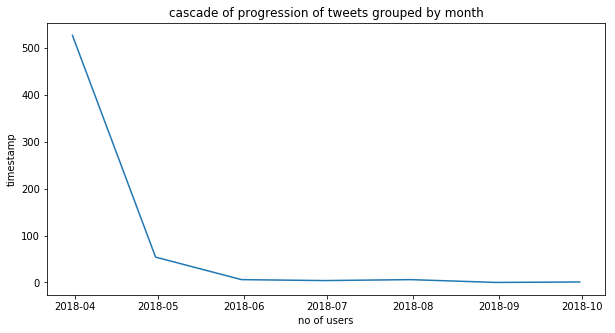

In [246]:
# it correrelates with the transient type graph as highlighted in the paper
%matplotlib inline
plt.figure(figsize=(10,5))
plt.title("cascade of progression of tweets grouped by month")
plt.xlabel("no of users")
plt.ylabel("timestamp")
plt.plot(cascade_tattoo.index,cascade_tattoo.values)
plt.show()

In [247]:
cascade_tattoo = cascade1.groupby(pd.Grouper(freq='d'))['tweetId'].agg('count')

In [248]:
index = [str(i) for i in cascade_tattoo.index]

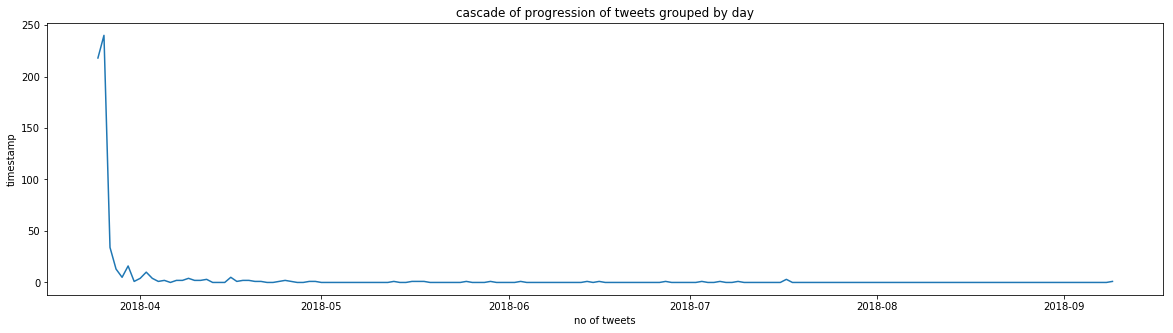

In [250]:
# so it is highly retweeted in the first month and then quicly drops
%matplotlib inline
plt.figure(figsize=(20,5))
plt.title("cascade of progression of tweets grouped by day")
plt.plot(cascade_tattoo.index,cascade_tattoo.values)
plt.xlabel("no of tweets")
plt.ylabel("timestamp")
plt.show()

In [251]:
## calculating the delay between each tweet
delay_time_users = list()
for i in range(len(cascade1)-1):
    temp = (cascade1.index[i+1] - cascade1.index[0])
    delay_time.append(temp)

In [252]:
def days_hours_minutes(td):
    return td.seconds

In [253]:
seconds_delay = [days_hours_minutes(td) for td in delay_time]

In [265]:
seconds_delay_df = pd.DataFrame(np.sort(seconds_delay), columns=['seconds_delay'])

In [271]:
users_seconds_delay = seconds_delay_df.groupby("seconds_delay").agg({"seconds_delay": lambda x: x.nunique()})

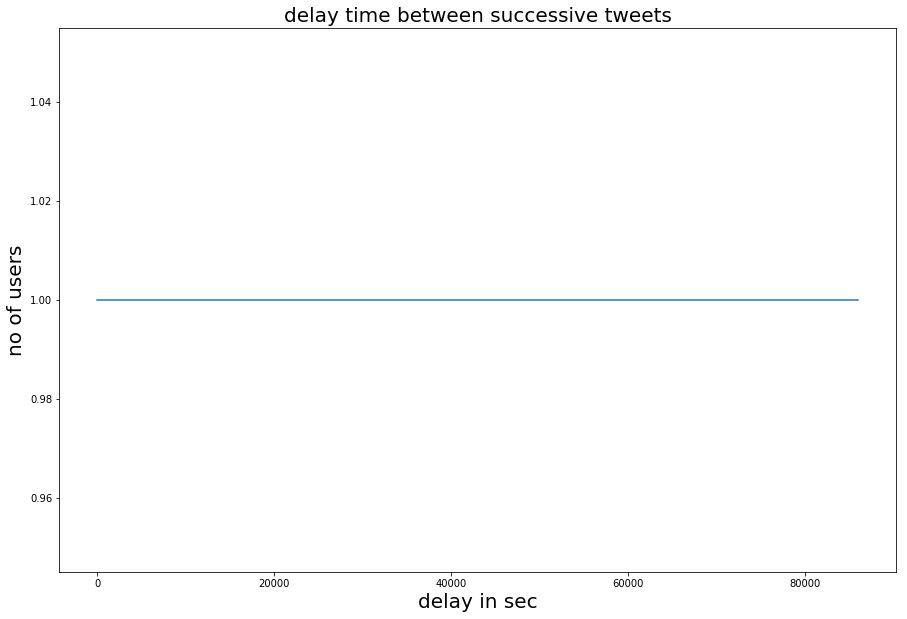

In [282]:
plt.figure(figsize=(15,10))
plt.title("delay time between successive tweets",fontsize=20)
plt.xlabel('delay in sec',fontsize=20)
plt.ylabel("no of users",fontsize=20)
plt.plot(users_seconds_delay.index,users_seconds_delay.values)
plt.show()

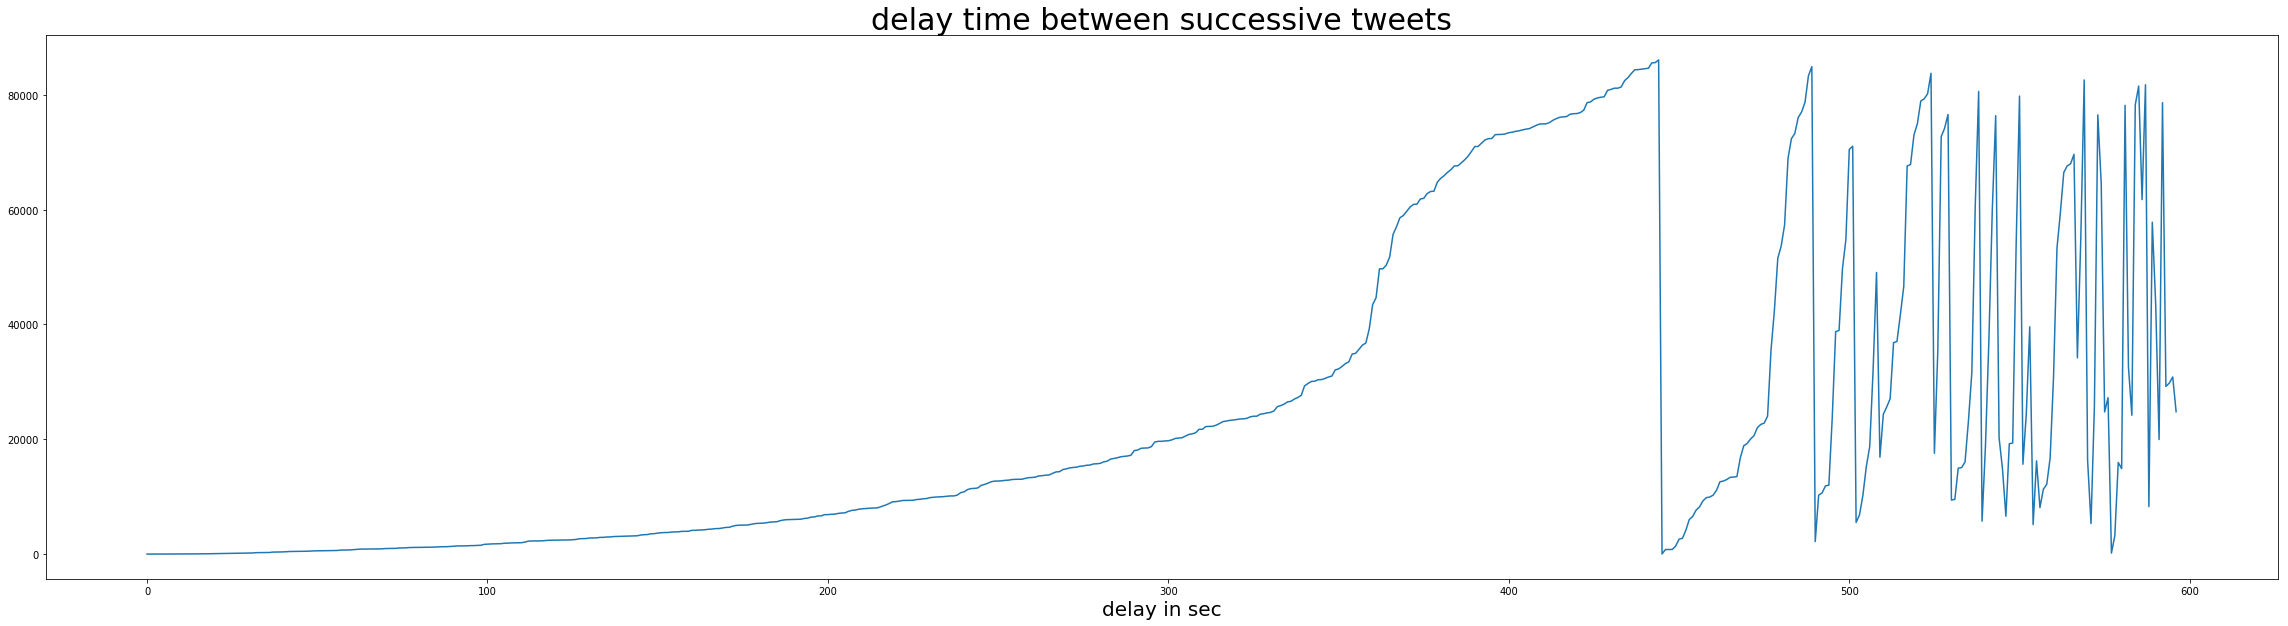

In [262]:
plt.figure(figsize=(40,10))
plt.title("delay time between successive tweets",fontsize=30)
plt.xlabel('delay in sec',fontsize=20)
plt.plot(np.arange(len(seconds_delay)),seconds_delay)
plt.show()

In [257]:
out_counts = dict()
for ele in out_degree:
    if ele not in out_counts.keys():
        out_counts[ele] = 1
    else:
        out_counts[ele] +=1

In [258]:
out_counts

{1: 345, 14: 1, 2: 28, 3: 3, 4: 2, 0: 8}

In [268]:
### add the no of follwers and following to each node
tattoo_users = [int(node) for node in list(G_tattoo_1.nodes())]

In [329]:
# creating the attributes of nodes
attr = dict()
for user in tattoo_users:
    user_data = hexagon_data.loc[hexagon_data.userID == user]
    attr[(user)] = {'friends' : list(user_data['friendsCount'])[0] , 'followers': list(user_data['userFollowersCount'])[0]}
    
    

In [330]:
nx.set_node_attributes(G_tattoo_1,attr)

In [360]:
G_tattoo_1.nodes[tattoo_node]

{'friends': 3936, 'followers': 186431}

In [383]:
adoption = list()
# adoption rate: out_degree / no of friends
adoption_rate_source = G_tattoo_1.out_degree(tattoo_node) / G_tattoo_1.nodes[tattoo_node]['friends']
adoption.append(adoption_rate_source)

In [384]:
# adoption rate for 1st level
level1_users = first_level_users
adoption_1 = list()
for node in level1_users:
    temp = G_tattoo_1.out_degree(node) / G_tattoo_1.nodes[node]['friends']
    adoption_1.append(temp)

In [385]:
# avg adoption for level 1
avg_1= sum(adoption_rate_1.values()) / len(adoption_rate_1)
adoption.append(avg_1)
avg_1

0.0061475204389758896

In [376]:
# level 2
level2_users = blue_users + pink_users

In [379]:
adoption_2 = list()
for node in level2_users:
    temp = G_tattoo_1.out_degree(node) / G_tattoo_1.nodes[node]['friends']
    adoption_2.append(temp)

In [386]:
avg2 = sum(adoption_2)/len(adoption_2)
adoption.append(avg2)

In [387]:
adoption

[0.003556910569105691, 0.0061475204389758896, 0.00427985395437535]

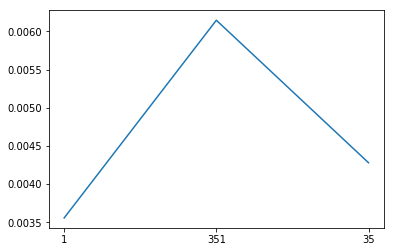

In [389]:
plt.plot(['1',str(len(level1_users)),str(len(level2_users))],adoption)
plt.title('adoption rate for the cascade')
plt.xlabel("exposure value")
plt.ylabel("no of users at the cascade level")

## dump the graph(gpickle ) and level of users

In [301]:
fh=open("/Users/akshayuppal/Desktop/thesis/twitter_juul/models/tattoo.edgelist",'wb')
nx.write_edgelist(G_tattoo_1,fh)
fh.close()

In [333]:
# gpickle the graph
nx.write_gpickle(G_tattoo_1,"/Users/akshayuppal/Desktop/thesis/twitter_juul/models/tattoo.gpickle")

In [283]:
G_tattoo_1 = nx.read_gpickle("/Users/akshayuppal/Desktop/thesis/twitter_juul/models/tattoo.gpickle")

In [391]:
# dump_first_level and seconds level
import pickle
users = dict()
users['source'] = tattoo_node
users['level1_users'] = level1_users
users['level2_users'] = level2_users
users['pink_users'] = pink_users
users['blue_users'] = blue_users
with open("/Users/akshayuppal/Desktop/thesis/twitter_juul/models/tatto_users.pkl",'wb') as f:
     pickle.dump(users,f)

In [57]:
from authentication import Authenticate
from collections import deque

In [58]:
ob = Authenticate()
apis = deque(ob.api)